In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings('ignore')

In [104]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


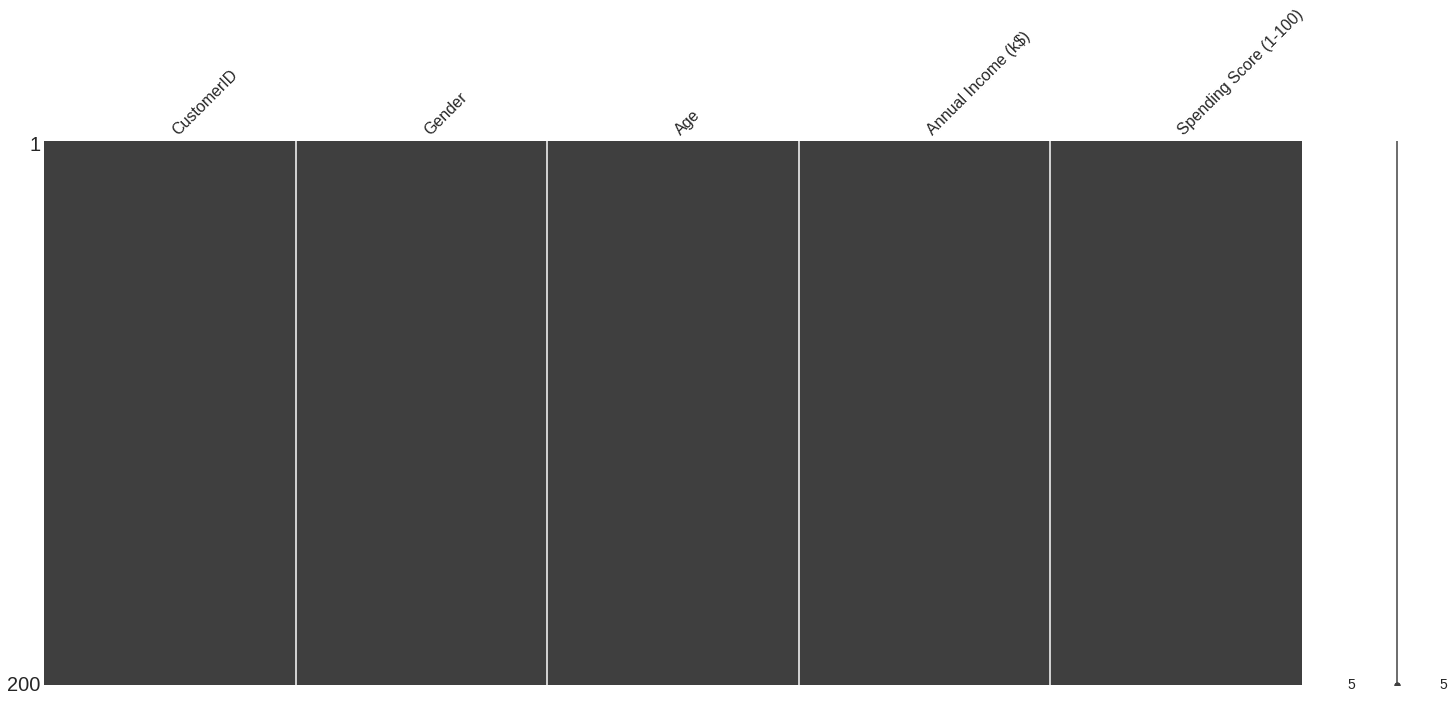

In [105]:
missingno.matrix(df)

In [106]:
df['Gender'].value_counts() # 백화점은 주로 여성 고객층이 많다.

Female    112
Male       88
Name: Gender, dtype: int64

In [107]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#gender

In [108]:
plt.style.use(['seaborn-dark'])
colors = sns.color_palette('pastel')[0:5]

gender_count = []
gender_count.append(df['Gender'].value_counts()[0])
gender_count.append(df['Gender'].value_counts()[1])

gender_count

[112, 88]

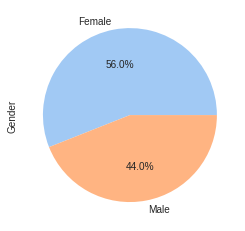

In [109]:
df['Gender'].value_counts().plot(kind='pie', autopct='%.1f%%', colors=colors)

# Age

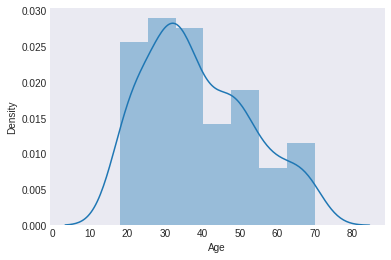

In [110]:
sns.distplot(df['Age'], bins=7)

In [111]:
df_age = df.groupby('Age').agg('count')
df_age.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
Age,,,,
18,4,4,4,4
19,8,8,8,8
20,5,5,5,5
21,5,5,5,5
22,3,3,3,3


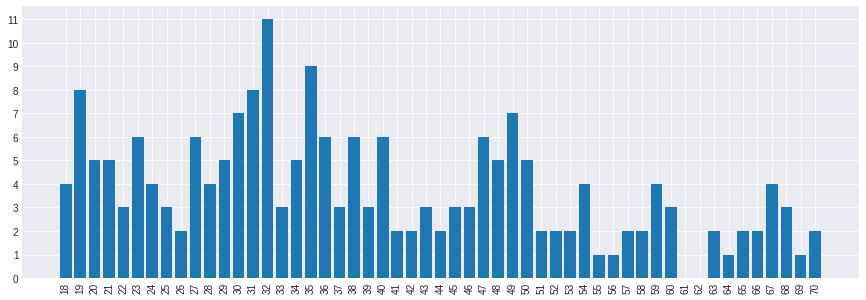

In [112]:
plt.figure(figsize=(15,5))
plt.bar(x=df_age.index, height=df_age['Annual Income (k$)']);
plt.xticks(np.arange(18, 71), rotation=90)
plt.yticks(np.arange(0, 12))
plt.grid()

# Annual income

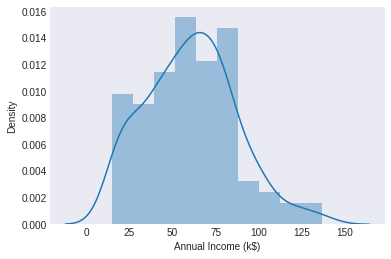

In [113]:
sns.distplot(df['Annual Income (k$)'])

# spending score

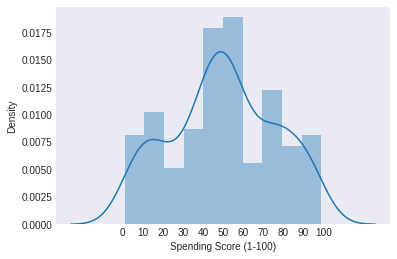

In [114]:
sns.distplot(df['Spending Score (1-100)'], bins=10)
plt.xticks(np.arange(0, 110, 10));

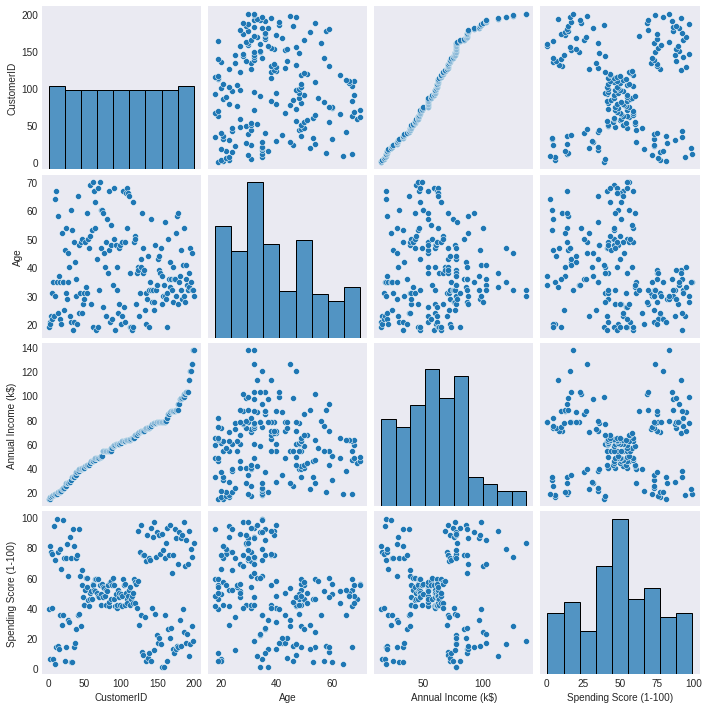

In [115]:
sns.pairplot(df)

# 상관관계 알아보기

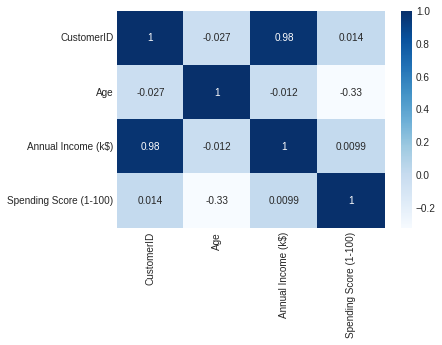

In [116]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)

# pairplot으로 보는 데이터:
* spending score vs annual income : 5개의 그룹으로 나눠 질것 같다는 생각
* spending score vs customer id : 5개의 그룹이 보임 (하지만 customer id는 별로 중요하지 않음)

In [117]:
df_clusters = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()

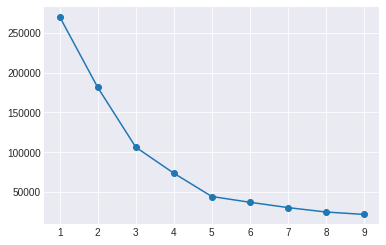

In [118]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

k_list = list(range(1, 10))
inertia = []

for k in k_list:
  km = KMeans(n_clusters=k, init='k-means++', random_state=1)
  labels = km.fit_predict(df_clusters)
  inertia.append(km.inertia_)

plt.plot(k_list, inertia, marker='o')
plt.grid() # 5 이후로 변화가 적으니 5선택

# k-means ++

In [119]:
df_clusters.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


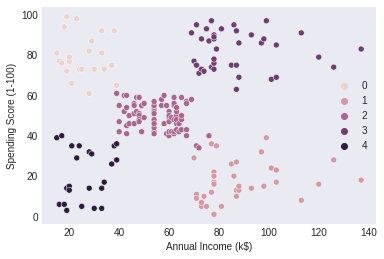

In [120]:
km = KMeans(n_clusters=5, init='k-means++', random_state=1)
labels = km.fit_predict(df_clusters)

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=labels, data=df_income_score)

# 계층적 군집 Agglomerative 

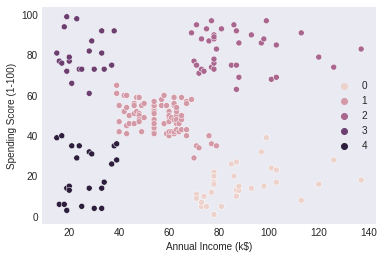

In [121]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=5)
labels = agg.fit_predict(df_clusters)

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=labels, data=df_income_score)

# DBSCAN

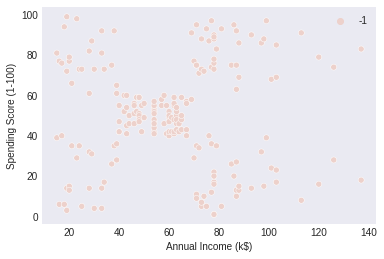

In [122]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.05, min_samples=5)
labels = db.fit_predict(df_clusters)

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=labels, data=df_income_score)

# spectral clustering

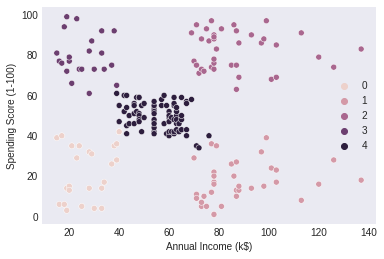

In [123]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', assign_labels='kmeans')
labels = sc.fit_predict(df_clusters)

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=labels, data=df_income_score)

내기준 분류를 잘 한 알고리즘 : 계층적 군집 > kmeans++ > spectral clustering 

DBSCAN은 분류를 잘 못하였다.